In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime as dt
import json
from ast import literal_eval
from random import randint


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

In [9]:
crime_df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
crime_df.shape

(925720, 28)

In [4]:
crime_df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [5]:
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'])
crime_df['year'] = crime_df['DATE OCC'].dt.year
crime_df['month'] = crime_df['DATE OCC'].dt.month

In [6]:
occurred = pd.to_datetime(crime_df['DATE OCC'], infer_datetime_format=True)
reported = pd.to_datetime(crime_df['Date Rptd'], infer_datetime_format=True)

crime_df['year'] = occurred.map(lambda x: x.year)
crime_df['month'] = occurred.map(lambda x: x.month)

crime_df = crime_df.drop(columns=['DATE OCC', 'Date Rptd'])

In [7]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           925720 non-null  int64  
 1   TIME OCC        925720 non-null  int64  
 2   AREA            925720 non-null  int64  
 3   AREA NAME       925720 non-null  object 
 4   Rpt Dist No     925720 non-null  int64  
 5   Part 1-2        925720 non-null  int64  
 6   Crm Cd          925720 non-null  int64  
 7   Crm Cd Desc     925720 non-null  object 
 8   Mocodes         796258 non-null  object 
 9   Vict Age        925720 non-null  int64  
 10  Vict Sex        802562 non-null  object 
 11  Vict Descent    802552 non-null  object 
 12  Premis Cd       925709 non-null  float64
 13  Premis Desc     925161 non-null  object 
 14  Weapon Used Cd  319701 non-null  float64
 15  Weapon Desc     319701 non-null  object 
 16  Status          925720 non-null  object 
 17  Status Des

In [8]:
crime_df.columns

Index(['DR_NO', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON',
       'year', 'month'],
      dtype='object')

In [9]:
crime_df['hour'] = crime_df['TIME OCC'] // 100

In [10]:
violent = ['BATTERY - SIMPLE ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'CRIMINAL HOMICIDE', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',\
          'DISCHARGE FIREARMS/SHOTS FIRED', 'BATTERY POLICE (SIMPLE)', 'RAPE', 'FORCIBLE BATTERY WITH SEXUAL CONTACT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',\
          'ROBBERY', 'SHOTS FIRED AT INHABITED DWELLING', 'OTHER ASSAULT', 'KIDNAPPING', 'BRANDISH WEAPON', 'ATTEMPTED ROBBERY']

theft = ['BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',\
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114',\
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',\
        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'THEFT, PERSON', 'BURGLARY, ATTEMPTED',\
        'BIKE - STOLEN', 'BUNCO, PETTY THEFT', 'BUNCO, GRAND THEFT', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',\
        'THEFT PLAIN - ATTEMPT']

vehicular = ['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', \
             'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 'VEHICLE - ATTEMPT STOLEN', 'BURGLARY FROM VEHICLE, ATTEMPTED']

crime_df['crime_type'] = crime_df['Crm Cd Desc'].apply(lambda x: 'violent' if x in violent else 'nonviolent')
crime_df['theft'] = crime_df['Crm Cd Desc'].apply(lambda x: 1 if x in theft else 0)
crime_df['vehicular'] = crime_df['Crm Cd Desc'].apply(lambda x: 1 if x in vehicular else 0)

In [40]:
#decision tree
#dividing into categorical and numerical features
categorical_cols = ['Premis Cd', 'Weapon Used Cd', 'Crm Cd', 'Rpt Dist No']
numerical_features = ['hour']

#encoding categorical features
label_encoder = LabelEncoder()
for feature in categorical_cols:
    crime_df[feature] = label_encoder.fit_transform(crime_df[feature])
X = crime_df[categorical_cols + numerical_features]

#target feature
y = crime_df['Part 1-2']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PCA to reduce dimentionality
pca = PCA(n_components=2)
#PCA on X_train
X_train_pca = pca.fit_transform(X_train)
#PCA on X_test
X_test_pca = pca.transform(X_test)
#model fitting
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.91
              precision    recall  f1-score   support

           1       0.93      0.93      0.93    163816
           2       0.90      0.89      0.89    113900

    accuracy                           0.91    277716
   macro avg       0.91      0.91      0.91    277716
weighted avg       0.91      0.91      0.91    277716



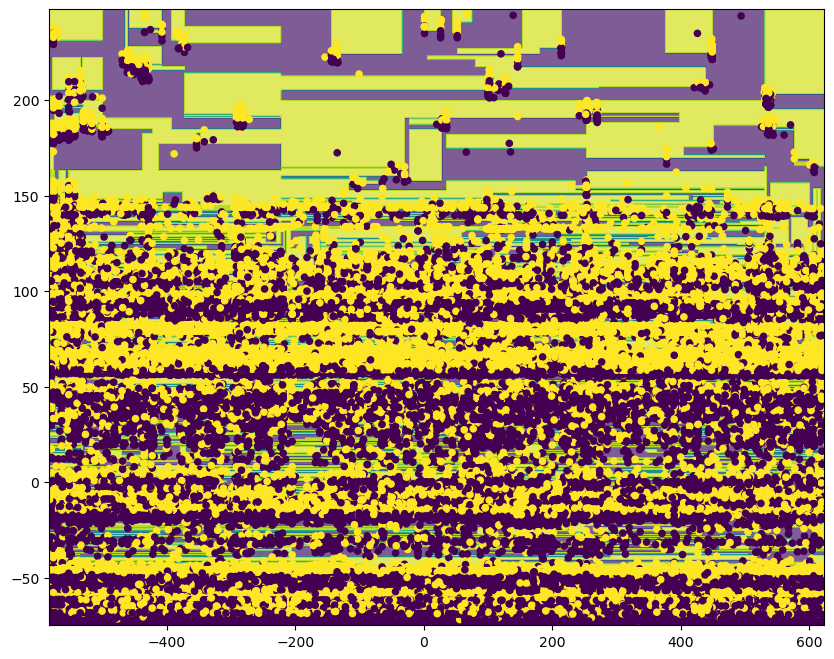

In [41]:
#Plot Decision Boundary
X_plot = X_test_pca

x_min, x_max = X_plot[:,0].min() - 0.5, X_plot[:,0].max() + 0.5
y_min, y_max = X_plot[:,1].min() - 0.5, X_plot[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# Make predictions for grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.7)
y_plot = y_test
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=20)
plt.show()

In [42]:
#Naive Bayes Classifier
categorical_features = ['AREA', 'Premis Cd', 'Weapon Used Cd', 'Part 1-2', 'crime_type']
numeric_features = ['hour', 'Vict Age']

# Encode categorical features as numbers
label_encoder = LabelEncoder()
for feature in categorical_features:
    crime_df[feature] = label_encoder.fit_transform(crime_df[feature])
# Encode Vict Sex as numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(crime_df['theft'])
# y = crime_df['hour']
X = crime_df[categorical_features + numeric_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Gaussian Naive Bayes for numerical features
gnb = GaussianNB()
gnb.fit(X_train[numeric_features], y_train)

# Multinomial Naive Bayes for categorical features
# mnb = MultinomialNB()
mnb = CategoricalNB()
mnb.fit(X_train[categorical_features], y_train)

# Combine predictions
y_pred = (gnb.predict_proba(X_test[numeric_features]) +
          mnb.predict_proba(X_test[categorical_features]))/2

y_pred = np.argmax(y_pred, axis=1)

# Evaluate predictions
print(accuracy_score(y_test, y_pred))

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

0.7899796914833859
              precision    recall  f1-score   support

           0       0.79      0.98      0.87    137440
           1       0.80      0.25      0.38     47704

    accuracy                           0.79    185144
   macro avg       0.80      0.61      0.62    185144
weighted avg       0.79      0.79      0.75    185144



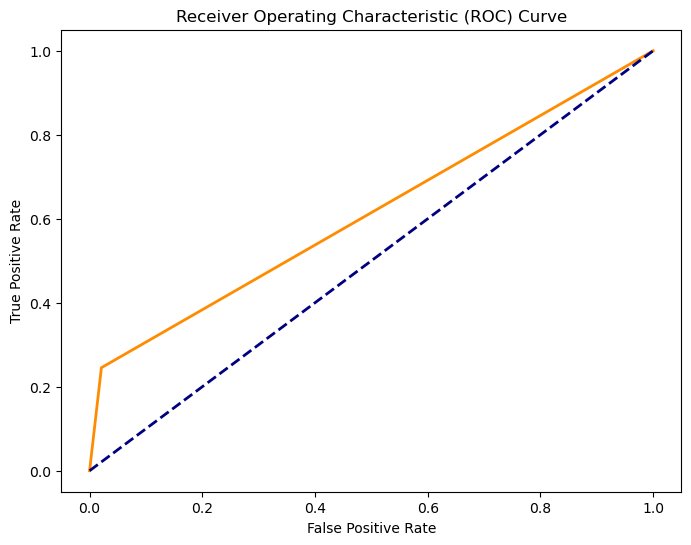

In [43]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [44]:
#Random Forest Classifier
train_cols = ['hour', 'month', 'LAT','LON', 'Rpt Dist No', 'Part 1-2', 'Vict Age'] 

In [45]:
model_df = crime_df.copy()
model_df = model_df[['crime_type','hour', 'month', 'LAT','LON', 'Rpt Dist No', 'Part 1-2', "Vict Age", 'theft', 'vehicular']]
model_df = model_df.dropna()

In [46]:
X = model_df[train_cols]
Y = model_df['vehicular']

X_train, X_test, y_train, y_test = train_test_split(X, Y)

clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini',\
max_depth = 25, max_features=4)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('train accuracy is', accuracy_score(y_train, y_train_pred) \
      ,'and test accuracy is', accuracy_score(y_test, y_test_pred))

train accuracy is 0.963181091474744 and test accuracy is 0.8778810007345633


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92    182264
           1       0.78      0.59      0.67     49166

    accuracy                           0.88    231430
   macro avg       0.84      0.77      0.80    231430
weighted avg       0.87      0.88      0.87    231430



In [48]:
feat_importance = pd.DataFrame(list(zip(train_cols, clf.feature_importances_)))

feat_importance.sort_values(1, ascending=True).head()

,0,1
1,month,0.078741
0,hour,0.079509
4,Rpt Dist No,0.081527
2,LAT,0.148606
3,LON,0.149667


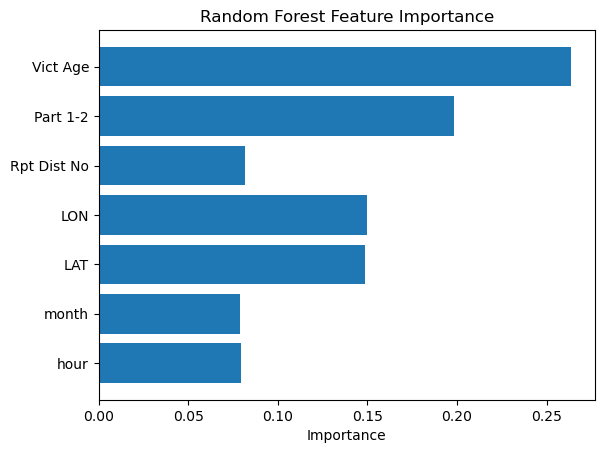

In [49]:
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of features
feature_list = list(train_cols)

# Create plot
plt.barh(feature_list, importances)

# Add title
plt.title('Random Forest Feature Importance')

# Add y-axis label
plt.xlabel('Importance')

# Show plot
plt.show()

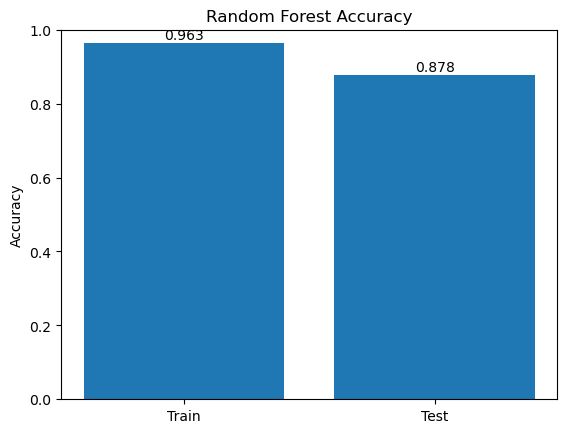

In [50]:
# Train and test accuracies from previous code
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Plot accuracies
plt.bar(['Train', 'Test'], [train_acc, test_acc])
plt.title('Random Forest Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0,1)

# Annotate values on bars
for i, v in enumerate([train_acc, test_acc]):
    plt.text(i, v + .01, str(round(v, 3)), ha='center')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()